In [ ]:
import pandas as pd
import numpy as np
import random
import scipy
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

In [ ]:
ab = "/content/ab_datas.csv"

In [ ]:
df = pd.read_csv(ab)

df.head()

,user_id,timestamp,group,landing_page,converted,revenue
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,100
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,250


Посмотрим, сколько посетителей заходио на сайт (количество строк в нашем датафрейме)

In [ ]:
#количество посетителей всего

n_rows = df.shape[0]
print("Число строк: {}".format(n_rows))

Число строк: 201773


Сколько уникальных пользователей (уникальных `user_id`) в датасете?

In [ ]:
user_total = df.nunique()['user_id']
print("Число уникальных пользователей : {}".format(user_total))

Число уникальных пользователей : 199967


Посетителей из контрольной `control` группы должны были направлять на страницу в старом дизайне  `old_page` , пользователей из тестовой группы `treatment` - на страницу в новом дизайне `new_page`. Проверим, были ли ошибки при направлении.

In [ ]:
mismatch_1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Из тестовой группы неверно направлены {}".format(len(mismatch_1)) + " пользователей")

mismatch_2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Из контрольной группы неверно направлены  {}".format(len(mismatch_2)) + " пользователей")


Из тестовой группы неверно направлены 1383 пользователей
Из контрольной группы неверно направлены  1321 пользователей


Выясним, есть ли в данных пропуски.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201773 entries, 0 to 201772
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       201773 non-null  int64 
 1   timestamp     201773 non-null  object
 2   group         201773 non-null  object
 3   landing_page  201773 non-null  object
 4   converted     201773 non-null  int64 
 5   revenue       201773 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 9.2+ MB


Из сообщений следует, что пропущенных значений нет.

Конверсия по всем посетителям

In [ ]:
p_all=df['converted'].mean()
print("Конверсия по всем посетителям: {} %".format(p_all*100))

Конверсия по всем посетителям: 11.997145306854733 %


In [ ]:
# можно и так:
sum(df['converted'].values)/n_rows

0.11997145306854733

In [ ]:
df_grp = df.groupby('group')
df_grp.describe()

user_id                               ... revenue              
              count           mean           std  ...     50%    75%    max
group                                             ...                      
control    100721.0  788078.473655  91128.687949  ...     0.0  100.0  250.0
treatment  101052.0  787545.863189  91149.823982  ...   100.0  250.0  250.0

[2 rows x 24 columns]

Ответы на остальные вопросы можно найти, например, так:

In [ ]:
mismatch_1 = df.query("group == 'treatment' and converted == 1")
print("Из тестовой группы {}".format(len(df[df['group'] == 'treatment'])) + " перешли {}".format(len(mismatch_1)) + " пользователей")

mismatch_2 = df.query("group == 'control' and converted == 1")
print("Из контрольной группы {}".format(len(df[df['group'] == 'control'])) + "перешли  {}".format(len(mismatch_2)) + " пользователей")

Из тестовой группы 101052 перешли 12038 пользователей
Из контрольной группы 100721перешли  12169 пользователей


In [ ]:
pers_1 = (len(df[df['group'] == 'treatment'])/100)
len(mismatch_1)/pers

11.912678620908048

In [ ]:
pers_2 = (len(df[df['group'] == 'control'])/100)
len(mismatch_2)/pers_2

12.081889576155916

In [ ]:
#объем тестовой группы
n_rows_treat = len(df[df['group'] == 'treatment'])

#объем контрольной группы
n_rows_contr = n_rows-n_rows_treat

print("Соотношение размеров тестовой и контрольной групп: {}".format(n_rows_treat/n_rows_contr))

print("Вероятность, что новый пользователь будет направлен на версию со старым дизайном: {}".format(n_rows_treat/n_rows))
print("Вероятность, что новый пользователь будет направлен на версию с новым дизайном: {}".format(n_rows_contr/n_rows))


Соотношение размеров тестовой и контрольной групп: 1.003286305735646
Вероятность, что новый пользователь будет направлен на версию со старым дизайном: 0.5008202286728155
Вероятность, что новый пользователь будет направлен на версию с новым дизайном: 0.4991797713271845


Предварительно данные о конверсии в обеих группах одинаковы, можно лишь сделать вывод, что дизайн не повлиял на принятие решения пользователем.

<a id='si1'></a>
#### Формулировка рабочей гипотезы

Рабочая гипотеза в нашем случае может быть сформулирована, например, так: "Конверсия сайта со старым дизайном не меньше, чем с новым"

<a id='si2'></a>
#### Формальное описание нулевой и альтернативной гипотез

$H_{0}$ : $\theta_{new}$ <= $\theta_{old}$ 

$H_{1}$ : $\theta_{new}$ > $\theta_{old}$ 

<a id='si4'></a>
#### Проведение вычислений. $Z$-критерий.

In [ ]:
#Z-статистика
import statsmodels.api as sm
import statsmodels

convert_contr = sum(df.query("group == 'control'")['converted'])
convert_treat = sum(df.query("group == 'treatment'")['converted'])

z_score, p_value = sm.stats.proportions_ztest([convert_treat, convert_contr], [n_rows_treat, n_rows_contr], 
                                              alternative='larger')

print("Z-статистика={},  p_value={}".format(z_score, p_value))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Z-статистика=-1.1696127210287675,  p_value=0.8789215721497121


#### Проведение вычислений. $T$-test.

In [ ]:
t_score, p_value, _ = statsmodels.stats.weightstats.ttest_ind(df.query("group == 'treatment'")['converted'],
                                                              df.query("group == 'control'")['converted'],
                                                              alternative="larger",
                                                              usevar='unequal')

In [ ]:
print("T-статистика={},  p_value={}".format(t_score, p_value))

T-статистика=-1.2369191070650962,  p_value=0.8919409489056577


#### Проведение вычислений. $Mann–Whitney$-test.

In [ ]:
w_score, p_value = scipy.stats.mannwhitneyu(df.query("group == 'treatment'")['converted'], 
                         df.query("group == 'control'")['converted'],
                         alternative="greater")

In [ ]:
print("W-статистика={},  p_value={}".format(w_score, p_value))

W-статистика=5080418051.0,  p_value=0.878921002369955


Результаты расчета критериев не позволяют отвергнуть нулевую гипотезу (z-критерий меньше мат.ожидания распределения, t-статистика меньше соответствующего квантиля для вероятности в 95%, а критерий Манна-Уитни превышает табличные значения)

<a id='m12'></a>
### Ошибки первого и второго рода

|  | | | |
|----------|:---------|:--------|:---------|
|  | | 	Верная гипотеза: | |
|  |     | $H_0$   | $H_1$    |
| Результат применения критерия: | $H_0$   |$H_0$ верно принята  |$H_0$ неверно принята (ошибка II рода)  |  
|  |$H_1$   |$H_0$ неверно отвергнута(ошибка I рода)  | $H_0$ верно отвергнута   |



## bootstrap  
Сделаем стат выводы при помощи bootstrap-а

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted,revenue
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,100
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,250


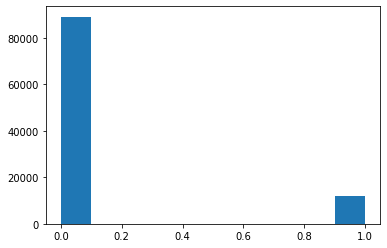

In [ ]:
plt.hist(df.loc[df['group']=='treatment', 'converted']);

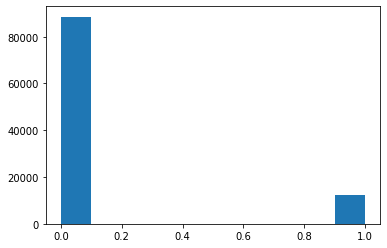

In [ ]:
plt.hist(df.loc[df['group']=='control', 'converted']);

In [ ]:
b = df.loc[df['group']=='treatment', 'converted'].values
a = df.loc[df['group']=='control', 'converted'].values

In [ ]:
from sklearn.utils import resample

a_means = []
b_means = []

for i in range(10000):
    a_boot = resample(a, replace=True, n_samples=len(a))
    b_boot = resample(b, replace=True, n_samples=len(b))
    
    a_means.append(a_boot.mean())
    b_means.append(b_boot.mean())
    
a_means = np.array(a_means)
b_means = np.array(b_means)

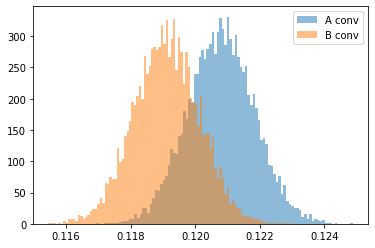

In [ ]:
plt.hist(a_means, label='A conv', alpha=0.5, bins=100)
plt.hist(b_means, label='B conv', alpha=0.5, bins=100)

plt.legend()
plt.show()

In [ ]:
# доверительный интервал
np.percentile(a_means, 2.5), np.percentile(a_means, 97.5)

(0.11880342728924455, 0.12281450740163422)

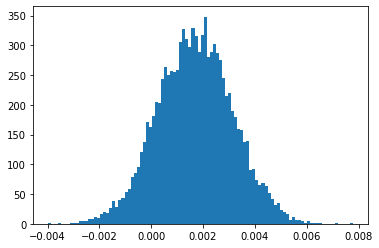

In [ ]:
plt.hist(a_means - b_means, bins=100)
plt.show()

In [ ]:
# сделаем оценку на p_value
dff = a_means - b_means

len(dff[dff>=0])/len(dff)

0.8798